## Identifying Repetitive Patterns

### Steinmetz Dataset

We will be using a subset of the Steinmetz dataset ([Nature 2019](https://www.nature.com/articles/s41586-019-1787-x)) which contains 3 Neuropixels recordings of 400-700 neurons each from across the mouse brain during a visual behavior task. Briefly, the task was a decision-making task where the mouse had to decide whether the contrast of a left stimulus is higher or the contrast of the right stimulus, and reported their decision by turning a wheel such that the stimulus with the higher contrast was moved to the center (e.g. if the right stimulus had a higher contrast, they moved the wheel to the left).

#### Download the data

If you have already downloaded the data, simply copy/cut and paste it into the `sessoin3` directory. Otherwise you can download the data (~6MB) from this link: [https://uni-bonn.sciebo.de/s/cELWgBIoFCl2ts3](https://uni-bonn.sciebo.de/s/cELWgBIoFCl2ts3)

For a more detailed decsription (maybe while the data is being downloaded?) you can watch this short (~8min) [YouTube video](https://youtu.be/WXn4-FpVaOo?si=0dIgwNUWGajmZ4B6)


### Task: Identify Repetitive Pattern to Extract Functions

Below we have some Python code that merges each behavioral variable for a specific session of Steinmetz dataset into a single numpy array. For example, the lick data which is originally saved as single `.npy` files for each trial will be merged into a single numpy array containing all trials.

Our goal is to improve this notebook by looking through the code, identifying repetitive patterns, and packaging those into functions (which are stored in modules).

- first make sure the code works (i.e. the notebook succesfully runs all the way)
- identify repetitive operations
- create a function that performs that operation
- store the functions into modules
- create a new notebook that does the same thing as this notebook, but uses the functions imported from modules
- finally, make sure the code still works :)

**Things to keep in mind**
- modules are created inside the `src` folder
- let's organize the functions and modules such that functions that are of the same category are stored in the same module
- Let's keep track and document our development by making commits (and pushing to GitHub)

---

In [1]:
%pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [2]:
import glob
import numpy as np
from tqdm import tqdm
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns

### Merge the licks data

In [11]:
path_to_behavior_data = "../../project/steinmetz-data/raw/subject-Lederberg/session-20171209/behavioral/"

In [8]:
path_to_licks_data = path_to_behavior_data + "licks/"
all_npy_files = glob.glob(path_to_licks_data + "*.npy")

licks_data = []
for filename in tqdm(all_npy_files, desc="Merging the licks data"):
    licks_data_per_trial = np.load(filename)
    licks_data.append(licks_data_per_trial)

licks_data = np.stack(licks_data)

Merging the licks data: 100%|██████████| 390/390 [00:00<00:00, 1909.56it/s]


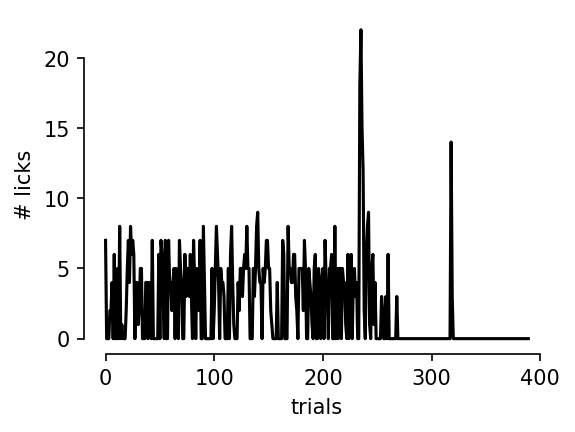

In [9]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=150)
ax.plot(licks_data.sum(axis=1), c="k")
ax.set_xlabel("trials")
ax.set_ylabel("# licks")
sns.despine(trim=True)

### Merge the face data

In [12]:
path_to_face_data = path_to_behavior_data + "face/"
all_npy_files = glob.glob(path_to_face_data + "*.npy")

face_data = []
for filename in tqdm(all_npy_files, desc="Merging the face data"):
    face_data_per_trial = np.load(filename)
    face_data.append(face_data_per_trial)

face_data = np.stack(face_data)

Merging the face data:   0%|          | 0/390 [00:00<?, ?it/s]

Merging the face data: 100%|██████████| 390/390 [00:00<00:00, 973.62it/s]


[Text(0.5, 0, 'time'), Text(0, 0.5, 'trials')]

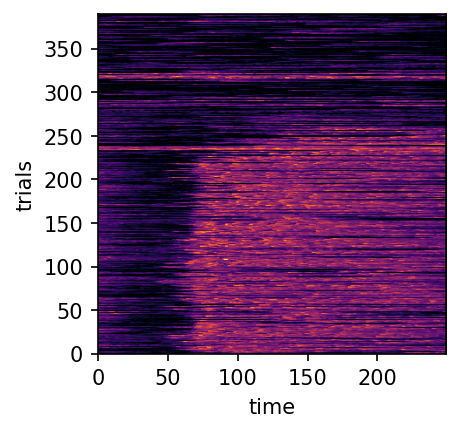

In [13]:
fig, ax = plt.subplots(figsize=(3, 3), dpi=150)
ax.imshow(face_data, cmap="inferno", aspect="auto", origin="lower")
ax.set(xlabel="time", ylabel="trials")

### Merge the wheel speed data

In [14]:
path_to_wheel_speed_data = path_to_behavior_data + "wheel_speed/"
all_npy_files = glob.glob(path_to_wheel_speed_data + "*.npy")

wheel_speed_data = []
for filename in tqdm(all_npy_files, desc="Merging the wheel_speed data"):
    wheel_speed_data_per_trial = np.load(filename)
    wheel_speed_data.append(wheel_speed_data_per_trial)

wheel_speed_data = np.stack(wheel_speed_data)

Merging the wheel_speed data: 100%|██████████| 390/390 [00:00<00:00, 1029.82it/s]


[Text(0.5, 0, 'time'), Text(0, 0.5, 'wheel speed')]

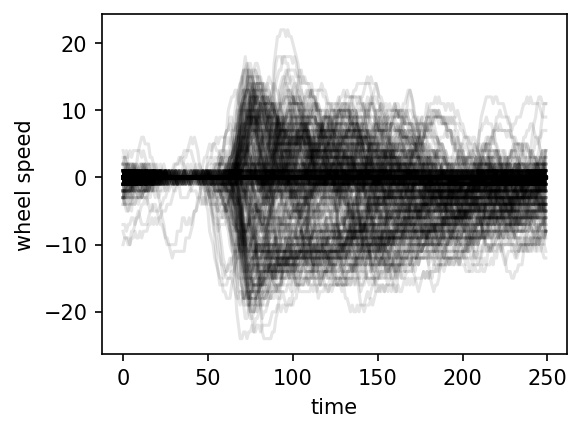

In [15]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=150)
ax.plot(wheel_speed_data.T, c="k", alpha=.1)
ax.set(xlabel="time", ylabel="wheel speed")

### Merge the pupil-related data as separate npy files

In [16]:
path_to_pupil_data = path_to_behavior_data + "pupil/"
all_mat_files = glob.glob(path_to_pupil_data + "*.mat")

#### Pupil area

In [17]:
pupil_area_data = []
for filename in tqdm(all_mat_files, desc="Merging the pupil_sarea data"):
    pupil_area_data_per_trial = loadmat(filename)["pupil_area"].squeeze()
    pupil_area_data.append(pupil_area_data_per_trial)

pupil_area_data = np.stack(pupil_area_data)

Merging the pupil_sarea data: 100%|██████████| 390/390 [00:00<00:00, 1117.47it/s]


#### Pupil $x$ position

In [18]:
pupil_x_data = []
for filename in tqdm(all_mat_files, desc="Merging the pupil_x data"):
    pupil_x_data_per_trial = loadmat(filename)["pupil_x"].squeeze()
    pupil_x_data.append(pupil_x_data_per_trial)

pupil_x_data = np.stack(pupil_x_data)

Merging the pupil_x data: 100%|██████████| 390/390 [00:00<00:00, 2434.68it/s]


#### Pupil $y$ position

In [19]:
pupil_y_data = []
for filename in tqdm(all_mat_files, desc="Merging the pupil_y data"):
    pupil_y_data_per_trial = loadmat(filename)["pupil_y"].squeeze()
    pupil_y_data.append(pupil_y_data_per_trial)

pupil_y_data = np.stack(pupil_y_data)

Merging the pupil_y data: 100%|██████████| 390/390 [00:00<00:00, 2485.82it/s]


In [20]:
n_trials, n_timebins = pupil_y_data.shape

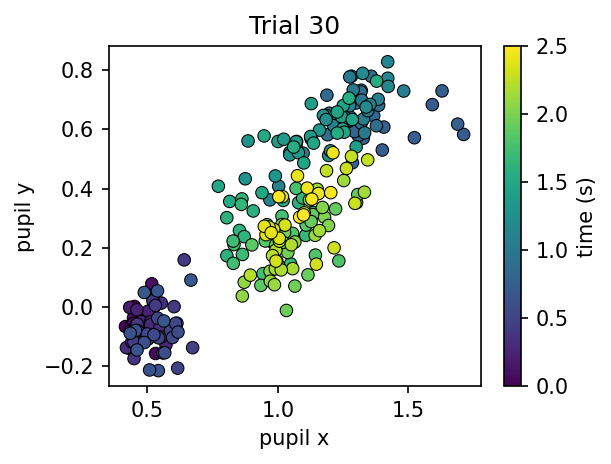

In [21]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=150)
trial_idx = 29
sc = ax.scatter(pupil_x_data[trial_idx], pupil_y_data[trial_idx], c=np.linspace(0, 2.5, n_timebins), ec='k', lw=.5)
ax.set(xlabel="pupil x", ylabel="pupil y", title=f"Trial {trial_idx+1}")

cbar = plt.colorbar(sc, ax=ax)
cbar.set_label('time (s)') 